# Task 1 : Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Upload the titanic dataset
df=pd.read_csv("Titanic dataset.csv")

In [23]:
# Data Prepossesing
# Drop the irralavent columns(eg: 'Passangerid','Name','Cabin','Ticket')
df=df.drop('PassengerId',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('Cabin', axis=1)
df=df.drop('Ticket', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [24]:
# Display the columns having null values
null_counts = df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts >= 0])

Columns with null values:
Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [25]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
mean_age = df['Fare'].mean()
df['Fare'].fillna(mean_age, inplace=True)

In [26]:
# Display the columns having null values
null_counts = df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts >= 0])

Columns with null values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# Task 2 : Exploratory Data Analysis (EDA)

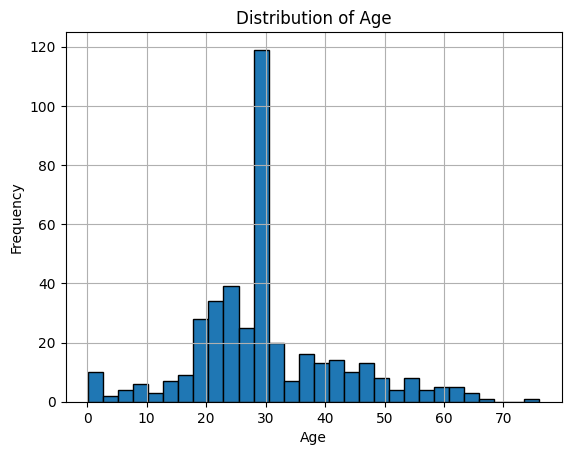

In [27]:
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


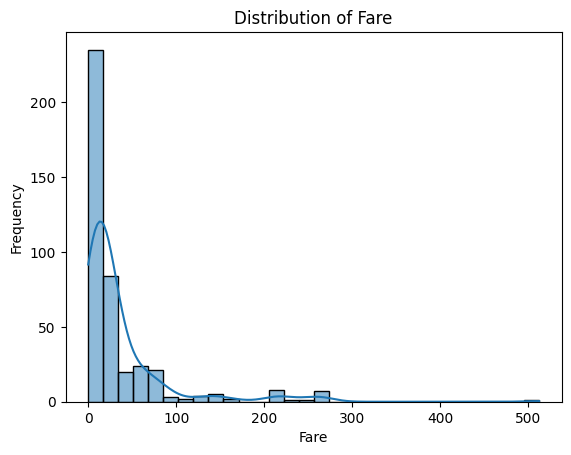

In [28]:
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


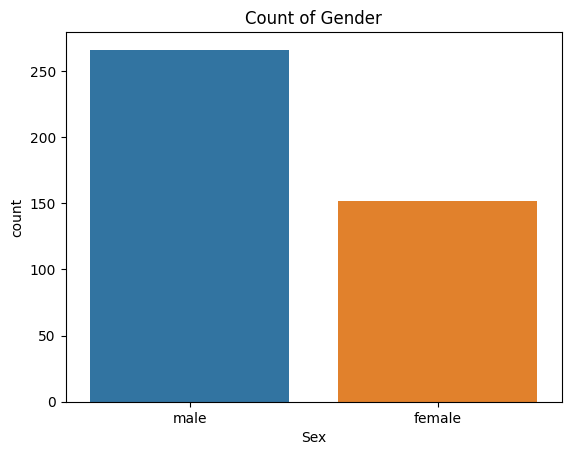

In [29]:
sns.countplot(x='Sex', data=df)
plt.title('Count of Gender')
plt.show()


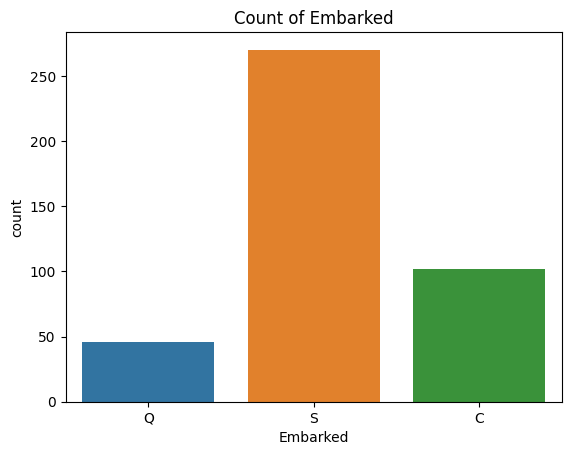

In [30]:
sns.countplot(x='Embarked', data=df)
plt.title('Count of Embarked')
plt.show()


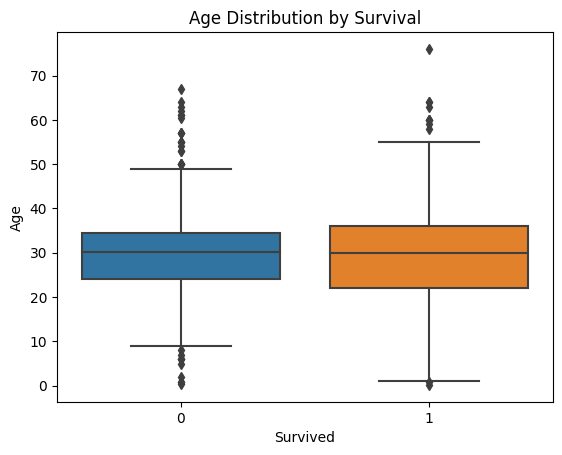

In [37]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()


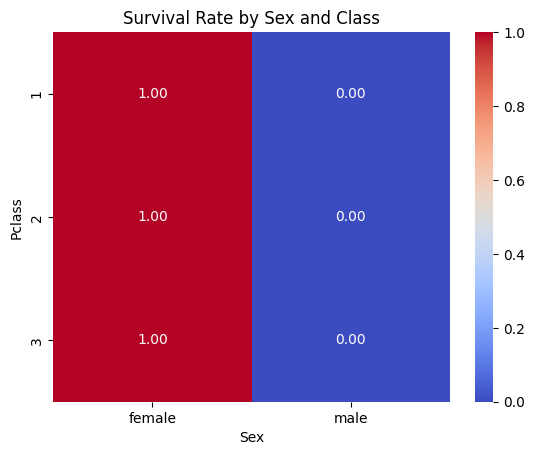

In [38]:
pivot_table = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Rate by Sex and Class')
plt.show()


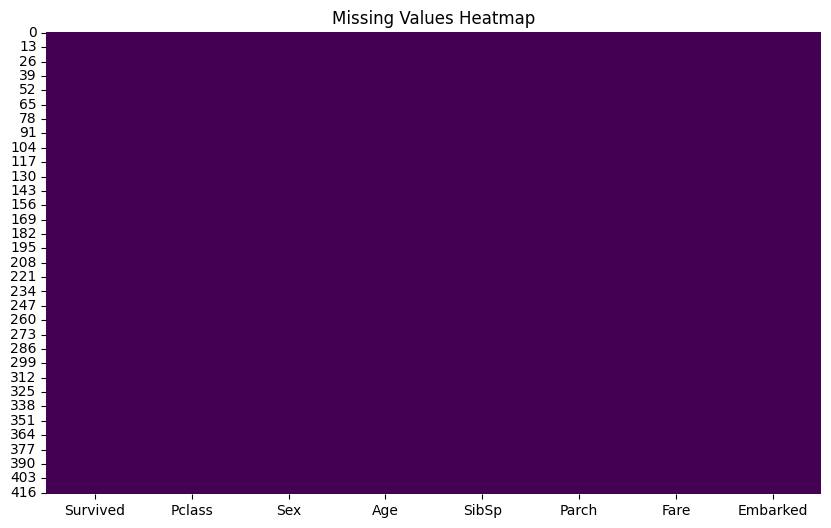

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [41]:
df.to_csv('cleaned_titanic_data.csv', index=False)
print("Data cleaning complete. Cleaned data saved to 'cleaned_titanic_data.csv'.")


Data cleaning complete. Cleaned data saved to 'cleaned_titanic_data.csv'.


# Task 3 : Data visualization

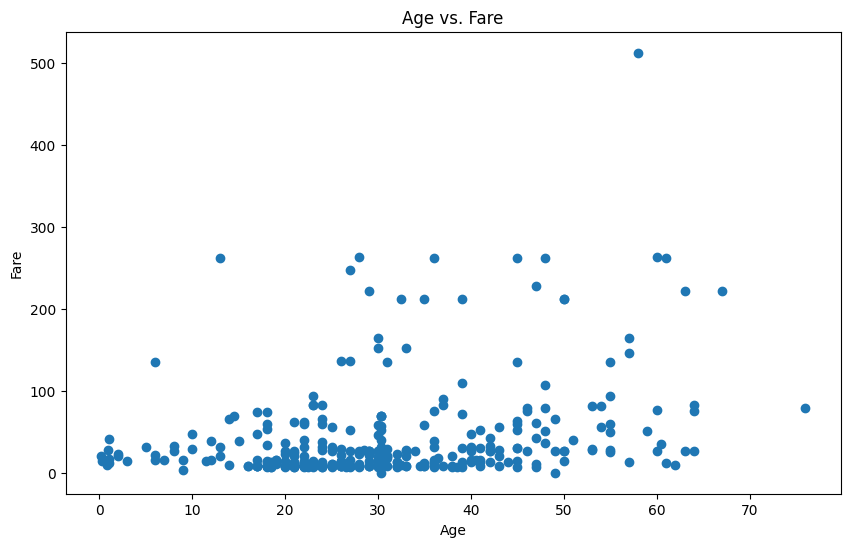

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df['Age'], df['Fare'], 'o')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

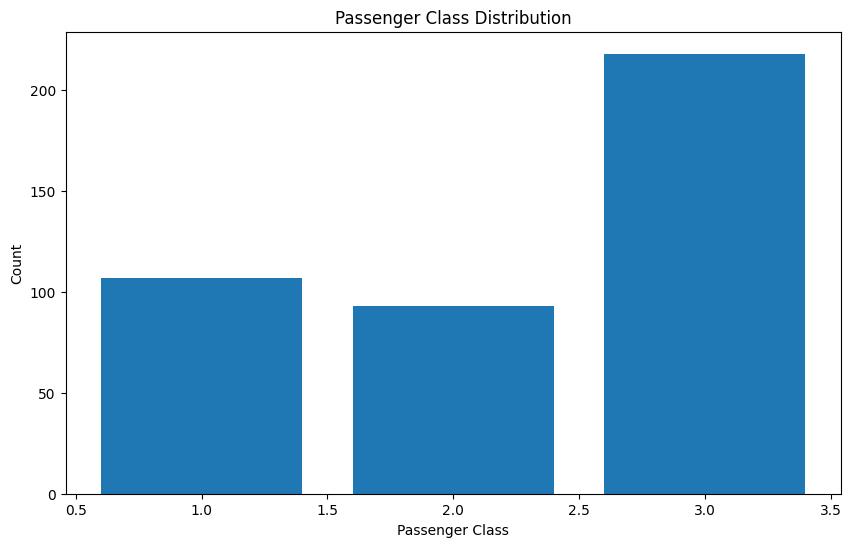

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(df['Pclass'].value_counts().index, df['Pclass'].value_counts())
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


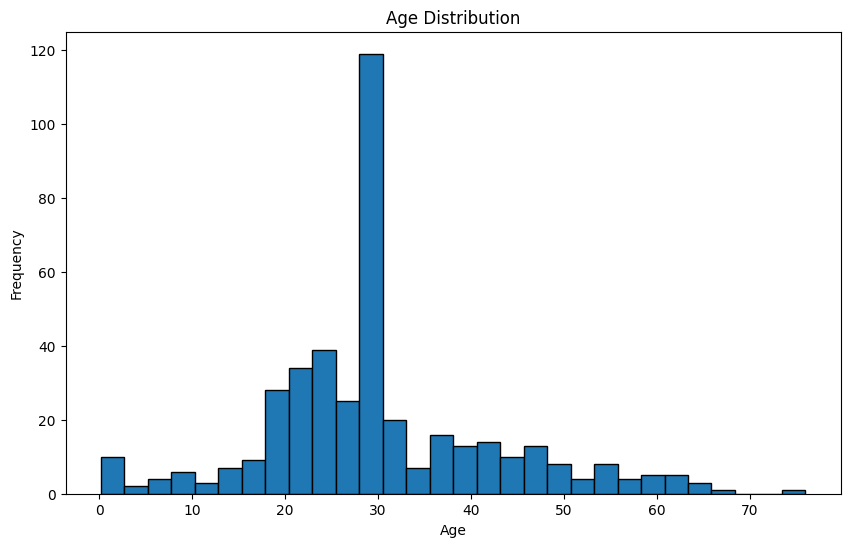

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


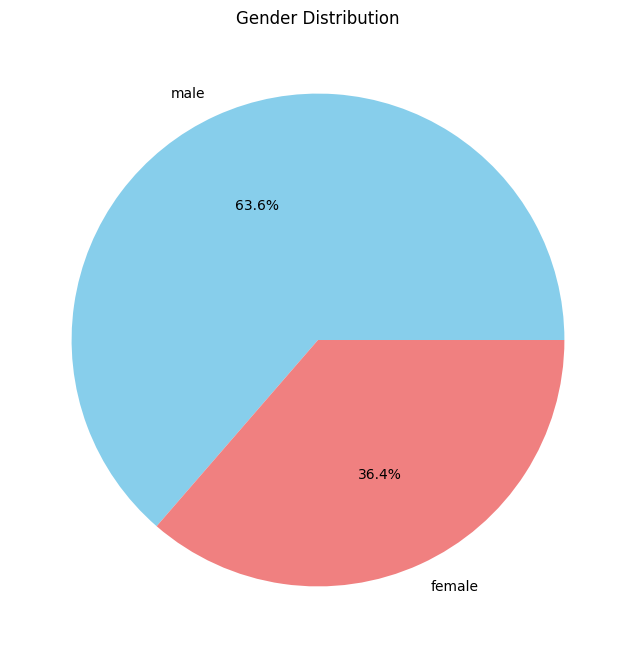

In [46]:
plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


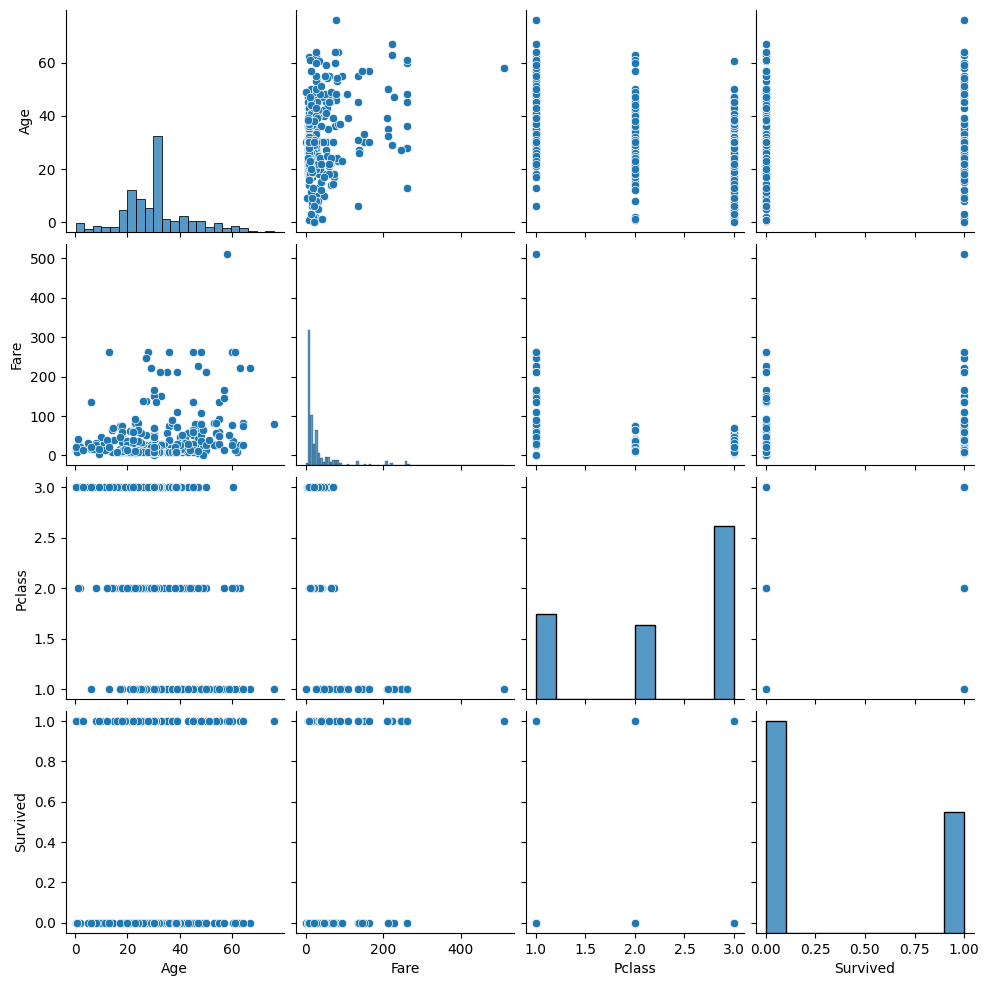

In [47]:
import seaborn as sns

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()


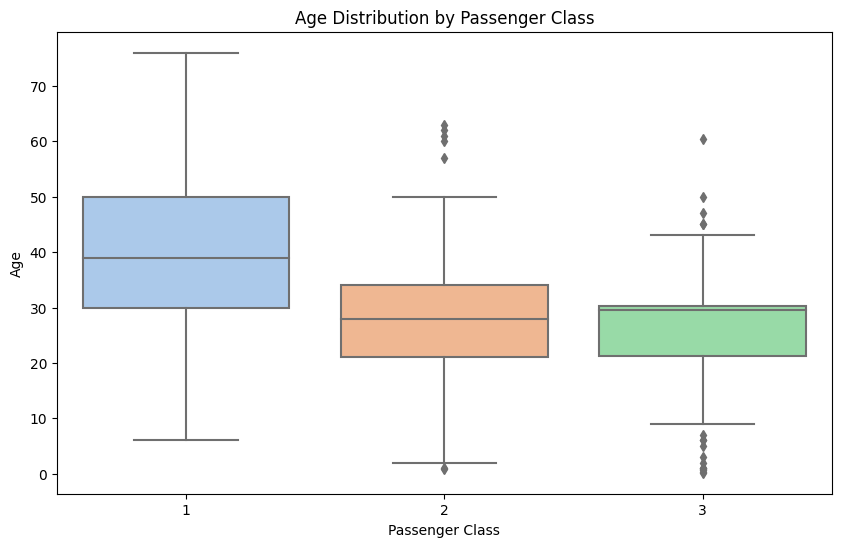

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


C:\Users\AKSHITA\AppData\Local\Temp\ipykernel_17720\968269470.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='viridis')


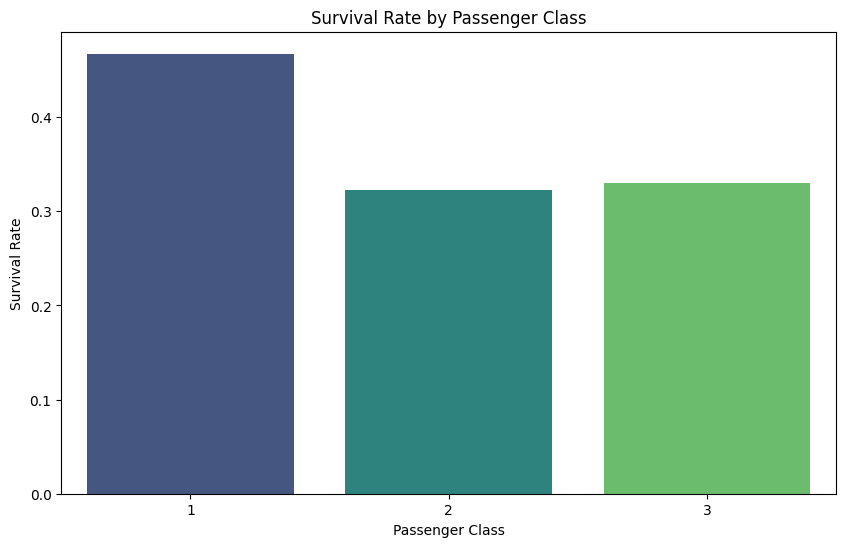

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


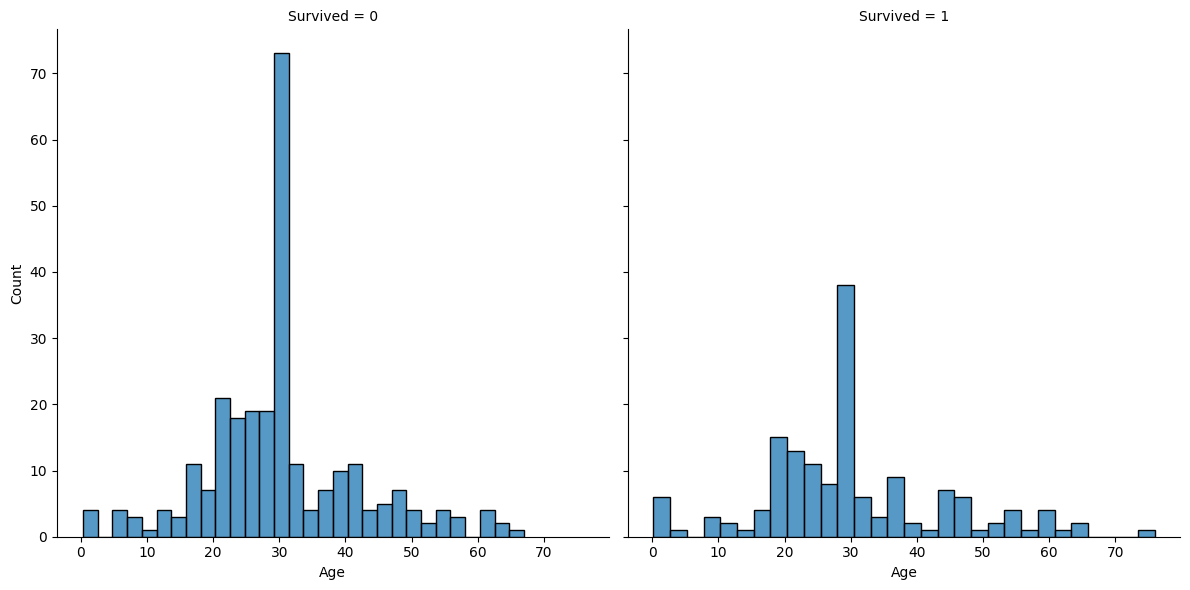

In [52]:
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=30)
plt.show()


# Task 4 : Descriptive Statistics 

In [55]:


# Display the first few rows of the dataframe
print(df.head())

# Summary statistics for numeric columns
summary_stats = df.describe()

print("Summary Statistics:\n", summary_stats)



   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S
Summary Statistics:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     0.363636    2.265550   30.272590    0.447368    0.392344   35.627188
std      0.481622    0.841838   12.634534    0.896760    0.981429   55.840500
min      0.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   23.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   30.272590    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.75

In [58]:
print(df.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [59]:
# Convert 'Age' and 'Fare' columns to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Check if conversion was successful
print(df[['Age', 'Fare']].dtypes)


Age     float64
Fare    float64
dtype: object


In [60]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [62]:
# Summary statistics for numeric columns
summary_stats = df.describe()

print("Summary Statistics:\n", summary_stats)



Summary Statistics:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     0.363636    2.265550   30.272590    0.447368    0.392344   35.627188
std      0.481622    0.841838   12.634534    0.896760    0.981429   55.840500
min      0.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   23.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   30.272590    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.750000    1.000000    0.000000   31.500000
max      1.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [73]:
df.Age.mean()

30.272590361445783

In [69]:
df_new=df.fillna(df.Age.mean())
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [70]:
df_new=df.fillna(df.Age.median())
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [71]:
mode_values = df.mode().iloc[0]
print("\nMode Values:\n", mode_values)


Mode Values:
 Survived           0
Pclass             3
Sex             male
Age         30.27259
SibSp              0
Parch              0
Fare            7.75
Embarked           S
Name: 0, dtype: object


In [76]:
df_new=df.fillna(df.Age.std())
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


# Task 5 : Data Aggregation and Grouping

In [82]:
df = pd.read_csv('advertising.csv')
print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [83]:
summary = df.describe()
print(summary)


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [84]:
# Create a new column 'Sales_Category' based on Sales
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 10, 20, np.inf], labels=['Low', 'Medium', 'High'])

# Group by 'Sales_Category'
grouped = df.groupby('Sales_Category')

# Calculate mean for each group
mean_values = grouped.mean()
print(mean_values)


                        TV      Radio  Newspaper      Sales
Sales_Category                                             
Low              26.647059  19.638235  29.647059   7.261765
Medium          151.032283  20.401575  29.050394  15.008661
High            239.010256  35.746154  36.241026  22.387179


In [85]:
# Aggregate multiple functions
agg_functions = grouped.agg({
    'TV': ['mean', 'sum'],
    'Radio': ['mean', 'sum'],
    'Newspaper': ['mean', 'sum'],
    'Sales': ['mean', 'sum', 'count']
})

print(agg_functions)


                        TV               Radio          Newspaper          \
                      mean      sum       mean     sum       mean     sum   
Sales_Category                                                              
Low              26.647059    906.0  19.638235   667.7  29.647059  1008.0   
Medium          151.032283  19181.1  20.401575  2591.0  29.050394  3689.4   
High            239.010256   9321.4  35.746154  1394.1  36.241026  1413.4   

                    Sales                
                     mean     sum count  
Sales_Category                           
Low              7.261765   246.9    34  
Medium          15.008661  1906.1   127  
High            22.387179   873.1    39  


In [86]:
pivot_table = pd.pivot_table(df, values='Sales', index='Sales_Category', columns='TV', aggfunc=np.mean)
print(pivot_table)


TV              0.7    4.1    5.4    7.3    7.8    8.4    8.6    8.7    11.7   \
Sales_Category                                                                  
Low               1.6    3.2    5.3    5.5    6.6    5.7    4.8    7.2    7.3   
Medium            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
High              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

TV              13.1   ...  281.4  283.6  284.3  286.0  287.6  289.7  290.7  \
Sales_Category         ...                                                    
Low               5.3  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Medium            NaN  ...    NaN    NaN   20.0    NaN    NaN    NaN   17.8   
High              NaN  ...   24.4   25.5    NaN   20.9   26.2   25.4    NaN   

TV              292.9  293.6  296.4  
Sales_Category                       
Low               NaN    NaN    NaN  
Medium            NaN    NaN    NaN  
High             21.4   20.7   23.8  

[3 rows